<a href="https://colab.research.google.com/github/guiiz23/Projetos/blob/main/An%C3%A1lise_Investimento_Lojas_Walmart.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Bibliotecas

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt
from matplotlib import pyplot
%matplotlib inline
from scipy import stats
import datetime as dt
import plotly.express as px

#Importando os dados

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Walmart.csv to Walmart (2).csv


In [ ]:
df = pd.read_csv('Walmart.csv', parse_dates=["Date"])

#Avaliando a estrutura dos dados

In [ ]:
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,2012-05-10,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,2012-12-10,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,2012-10-19,718125.53,0,56.47,3.969,192.330854,8.667


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   int64         
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 402.3 KB


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Store,6435.0,2.300000e+01,12.988182,1.000,12.000,23.000000,3.400000e+01,4.500000e+01
Weekly_Sales,6435.0,1.046965e+06,564366.622054,209986.250,553350.105,960746.040000,1.420159e+06,3.818686e+06
Holiday_Flag,6435.0,6.993007e-02,0.255049,0.000,0.000,0.000000,0.000000e+00,1.000000e+00
Temperature,6435.0,6.066378e+01,18.444933,-2.060,47.460,62.670000,7.494000e+01,1.001400e+02
Fuel_Price,6435.0,3.358607e+00,0.459020,2.472,2.933,3.445000,3.735000e+00,4.468000e+00
CPI,6435.0,1.715784e+02,39.356712,126.064,131.735,182.616521,2.127433e+02,2.272328e+02
Unemployment,6435.0,7.999151e+00,1.875885,3.879,6.891,7.874000,8.622000e+00,1.431300e+01


#Preparação dos dados

Conversão de date para: Ano, Mês e dia. Dados enviados a um novo Data Frame chamado: df_date

In [ ]:
df_date = df[:]

In [ ]:
df_date['Date'] = pd.to_datetime(df_date['Date'])
df_date['Year'] = df_date['Date'].dt.year
df_date['Month'] = df_date['Date'].dt.month
df_date['Day'] = df_date['Date'].dt.day
df_date.drop('Date',axis=1,inplace=True)
df_date.head()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Day
0,1,1643690.90,0,42.31,2.572,211.096358,8.106,2010,5,2
1,1,1641957.44,1,38.51,2.548,211.242170,8.106,2010,12,2
2,1,1611968.17,0,39.93,2.514,211.289143,8.106,2010,2,19
3,1,1409727.59,0,46.63,2.561,211.319643,8.106,2010,2,26
4,1,1554806.68,0,46.50,2.625,211.350143,8.106,2010,5,3


#Visualização dos dados

##Tabela filtrada por: Ano, Mês e Loja

In [ ]:
df_filtro1 = df_date.groupby(['Year', 'Month', 'Store'])['Weekly_Sales', 'CPI', 'Unemployment', 'Temperature', 'Fuel_Price'].mean()
display(df_filtro1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



Weekly_Sales         CPI  Unemployment  Temperature  \
Year Month Store                                                        
2010 1     1        1453329.50  211.671989         7.838        71.89   
           2        1827440.43  211.329874         8.163        69.24   
           3         358784.10  214.984655         7.564        73.60   
           4        1842821.02  126.234600         7.127        63.96   
           5         283178.12  212.226946         6.768        71.10   
...                        ...         ...           ...          ...   
2012 12    41       1409544.97  199.053937         6.195        39.38   
           42        612379.90  131.108333         6.943        76.03   
           43        619369.72  214.677283         8.839        71.14   
           44        337796.13  131.108333         5.217        55.10   
           45        734464.36  192.327265         8.667        54.47   

                  Fuel_Price  
Year Month Store              
2010 1     1           2.603  
           2           2.603  
           3           2.603  
           4           2.619  
           5           2.603  
...                      ...  
2012 12    41          3.760  
           42          4.468  
           43          3.601  
           44          3.797  
           45          4.000  

[1620 rows x 5 columns]

##Gráfico da média de vendas semanais por loja

In [ ]:
df_store = df[['Store','Weekly_Sales']]

df_store = df_store.groupby(['Store'], as_index=False).mean()
df_store = df_store.sort_values(by=['Weekly_Sales'], ascending = False)
df_store.reset_index(inplace = True, drop = True)

No handles with labels found to put in legend.


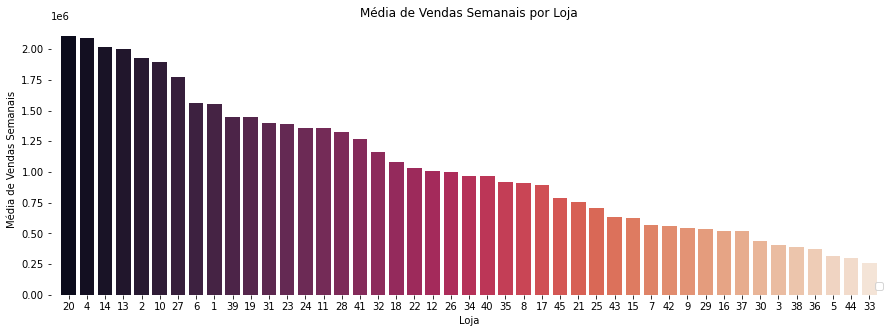

In [ ]:
f, ax = plt.subplots(figsize=(15, 5))
sns.barplot(y="Weekly_Sales", x="Store", data=df_store, palette='rocket', order=df_store['Store'])


ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(-1,45), ylabel="Média de Vendas Semanais", xlabel="Loja", title= "Média de Vendas Semanais por Loja")
sns.despine(left=True, bottom=True)

##Vendas Médias por Mês

Text(0.5, 1.0, 'Média de vendas por mês no período de 3 anos')

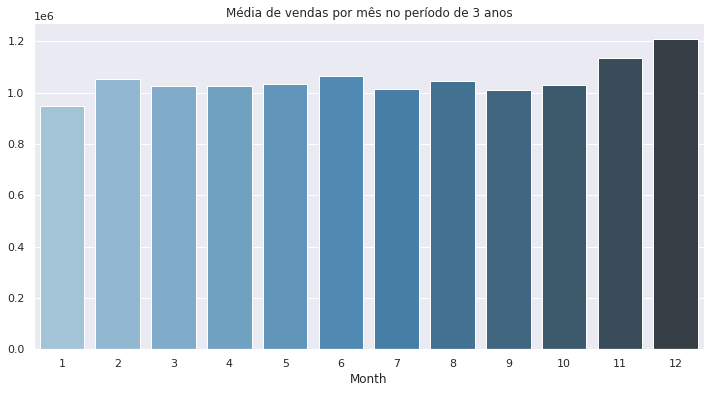

In [ ]:
df_tmes = df_date.groupby('Month')['Weekly_Sales'].mean()
sns.set(rc = {'figure.figsize':(12,6)})
sns.barplot(x = df_tmes.index, y = df_tmes.values,palette='Blues_d').set_title('Média de vendas por mês no período de 3 anos')

##Box Plots

###Box Plot de Desemprego

In [ ]:
fig = px.box(df['Unemployment'], title = 'Box Plot de Desemprego', width=400, height=600)
fig.show()

###Box Plot de Vendas Semanais

In [ ]:
fig = px.box(df['Weekly_Sales'], title = 'Box Plot de Vendas Semanais', width=400, height=600)
fig.show()

Outliers podem ser justificados pelos ganhos elevados dos feriados.

###Box Plot de CPI

In [ ]:
fig = px.box(df['CPI'], title = 'Box Plot de CPI', width=400, height=600)
fig.show()

###Box Plot do Combustível

In [ ]:
fig = px.box(df['Fuel_Price'], title = 'Box Plot de Combustível', width=400, height=600)
fig.show()

###Box Plot de Temperatura

In [ ]:
fig = px.box(df['Temperature'], title = 'Box Plot de Temperatura', width=400, height=600)
fig.show()

##Gráfico dos ganhos semanais em função do tempo, por loja.

Tabela interativa, com possibildiade de escolha do período e da loja desejada. 

In [ ]:
df_graph_line = df.sort_values(['Date', 'Store'])

In [ ]:
fig = px.line(df_graph_line, y="Weekly_Sales", x="Date", color='Store', title='Vendas Semanais por Loja por Tempo')
fig.show()

##Desemprego em função do tempo

Cores representam as vendas semanais, quanto mais amarelo maior a venda semanal daquele ponto.

In [ ]:
fig = px.scatter(df, x="Date", y="Unemployment", color="Weekly_Sales")
fig.show()

O gráfico nos mostra que há menos vendas semanais em pontos cujo índice de desempregro é elevado, entretando há poucos dados para relacionar tais índices.

##Gráfico radial das vendas semanais relacionadas com o desemprego

In [ ]:
fig = px.scatter_polar(df, r="Unemployment", theta="Weekly_Sales", color="Weekly_Sales", title='Vendas Semanais e Desemprego',  width=1000, height=800, color_discrete_sequence=px.colors.sequential.Plasma_r)
fig.show()

O gráfico, embora normalmente utilizado para plots geograficos, reforça a conclusão anterior. O índice de desemprego, quando elevado, afeta os ganhos semanais. Entretanto, baixos índices de desemprego não são garantias ou indicadores de ganhos semanais!

##Violino do Desemprego por Loja

In [ ]:
fig = px.violin(df, y="Unemployment", x="Store", color="Store", box=True, points="all", hover_data=df.columns)
fig.show()

Não parecem haver outliers significativos ou dados com grande desvio (*deviance*)

##Violino das Vendas Semanais por Loja

In [ ]:
fig = px.violin(df, y="Weekly_Sales", x="Store", color="Store", box=True, points="all", hover_data=df.columns)
fig.show()

Não parecem haver outliers significativos ou dados com grande desvio (*deviance*)

##Violino de CPI por loja

In [ ]:
fig = px.violin(df, y="CPI", x="Store", color="Store", box=True, points="all", hover_data=df.columns)
fig.show()

Interessante observar que as variações são pequenas e que, provavelmente, não serão relevantes para a tomada de decisão final. 

#Análise dos dados

##Análise correlacional

In [ ]:
df.corr()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
Store,1.000000e+00,-0.335332,-4.386841e-16,-0.022659,0.060023,-0.209492,0.223531
Weekly_Sales,-3.353320e-01,1.000000,3.689097e-02,-0.063810,0.009464,-0.072634,-0.106176
Holiday_Flag,-4.386841e-16,0.036891,1.000000e+00,-0.155091,-0.078347,-0.002162,0.010960
Temperature,-2.265908e-02,-0.063810,-1.550913e-01,1.000000,0.144982,0.176888,0.101158
Fuel_Price,6.002295e-02,0.009464,-7.834652e-02,0.144982,1.000000,-0.170642,-0.034684
CPI,-2.094919e-01,-0.072634,-2.162091e-03,0.176888,-0.170642,1.000000,-0.302020
Unemployment,2.235313e-01,-0.106176,1.096028e-02,0.101158,-0.034684,-0.302020,1.000000


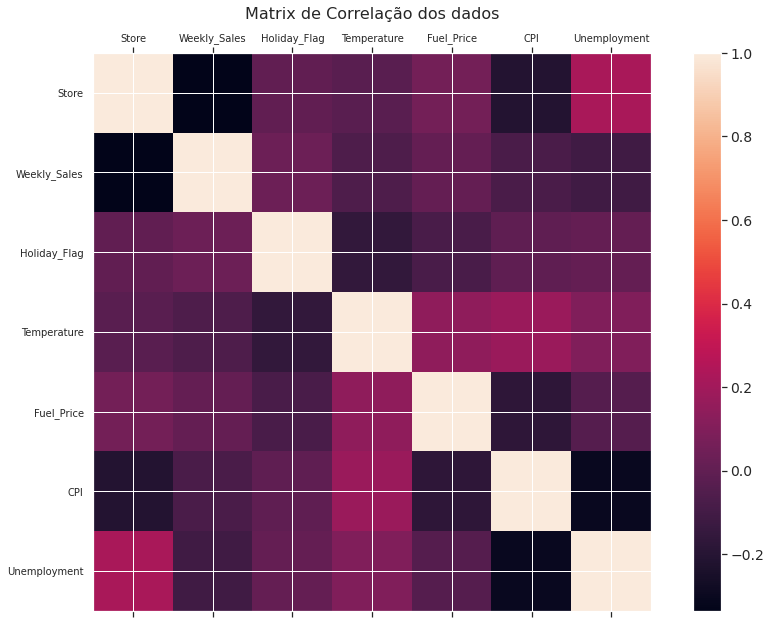

In [ ]:
f = plt.figure(figsize=(15, 10))
plt.matshow(df.corr(), fignum=f.number)
plt.xticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=10, rotation=0)
plt.yticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=10)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Matrix de Correlação dos dados', fontsize=16);

Não há correlação significativa entre os dados.

##Variação do período

Criação de dois dataframes: df_in (dataframe inicial), df_end (dataframe final). Utilizados para relacionar os dados do final do período com o começo. 

In [ ]:
df_in = df[df['Date'] == '05-02-2010'].reset_index(drop=True)
df_in = df_in.set_index('Store')
df_in.drop(labels="Date", axis=1, inplace = True)
df_end = df[df['Date'] == '26-10-2012'].reset_index(drop=True)
df_end = df_end.set_index('Store')
df_end.drop(labels="Date", axis=1, inplace = True)

##Variação dos dados brutos no período

In [ ]:
df_grow2 = df_end - df_in
df_grow2

,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
Store,,,,,,
1,-150031.16,0,26.85,0.934,12.347893,-1.533
2,-302531.11,0,29.60,0.934,12.325731,-2.154
3,-56189.52,0,28.95,0.934,12.562483,-1.334
4,14450.59,0,19.88,0.916,4.751032,-4.744
5,2377.67,0,32.00,0.934,12.383842,-1.144
6,-221208.76,0,31.91,0.934,12.446274,-1.930
7,-1182.16,0,32.00,1.106,9.837834,-1.457
8,-112465.65,0,30.60,0.934,12.565485,-1.175
9,225.94,0,31.51,0.934,12.577348,-1.461


* Observa-se que a loja 39 possuí o maior crescimento em ganhos semanais brutos.
* A loja 9 teve o maior aumento no índice CPI, a 38 o menor.
* A loja 24 teve o maior crescimento no índice de desemprego, enquanto a loja 4 teve a maior redução.



##Análise percentual dos dados

In [ ]:
df_grow = (df_end*100 / df_in) - 100
df_grow

,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
Store,,,,,,
1,-9.127699,NaN,63.460175,36.314152,5.849411,-18.911917
2,-14.156884,NaN,73.650162,36.314152,5.848436,-25.876982
3,-12.172187,NaN,63.334063,36.314152,5.858687,-18.105320
4,0.676797,NaN,45.429616,35.257891,3.757478,-55.015656
5,0.749644,NaN,80.604534,36.314152,5.850985,-17.423089
6,-13.385215,NaN,78.926540,36.314152,5.853700,-26.587684
7,-0.237991,NaN,303.893637,42.868217,5.194712,-16.163745
8,-11.200229,NaN,89.630931,36.314152,5.858815,-18.653755
9,0.041117,NaN,82.899237,36.314152,5.859319,-22.774747


* A loja 44 teve maior crescimento percentual no período (28,5%), acompanhada de perto pela loja 39 (27,5%)
* As lojas: 44, 17, 38, 13, 4, 34, 42, 33, 12, 10 e 28, tiveram a menor taxa de crescimento no CPI (3,76%)
* A loja 9 teve o maior crescimento percentual no CPI (5,859%)
* A loja 4 teve a maior queda percentual no desemprego (55%), acompanhada pela loja 44 (35%).
* A loja 24 teve o maior aumento no índice de desemprego (4,4%) 

###Plot das Porcentagens de Vendas Semanais

No handles with labels found to put in legend.


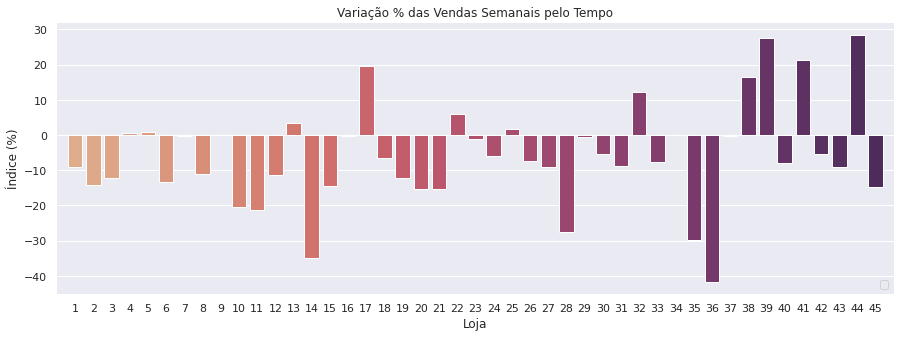

In [ ]:
f, ax = plt.subplots(figsize=(15, 5))
sns.barplot(y="Weekly_Sales", x=df_grow.index, data=df_grow, palette="flare", order=df_grow.index)


ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(-1,45), ylabel="Índice (%)", xlabel="Loja", title= "Variação % das Vendas Semanais pelo Tempo")
sns.despine(left=True, bottom=True)

**A maioria das lojas apresentou retração ao longo do período avaliado!**

###Plot das Porcentagens de Desemprego

No handles with labels found to put in legend.


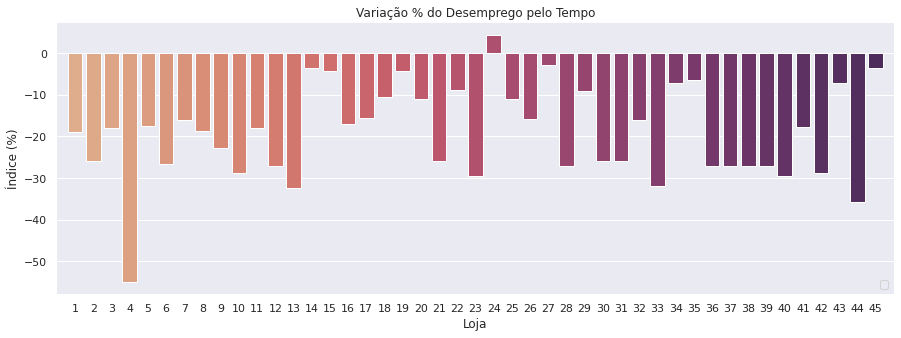

In [ ]:
f, ax = plt.subplots(figsize=(15, 5))
sns.barplot(y="Unemployment", x=df_grow.index, data=df_grow, palette="flare", order=df_grow.index)


ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(-1,45), ylabel="Índice (%)", xlabel="Loja", title= "Variação % do Desemprego pelo Tempo")
sns.despine(left=True, bottom=True)

A grande maioria das lojas apresentou redução no desemprego no período avaliado

###Plot Porcentagem CPI

No handles with labels found to put in legend.


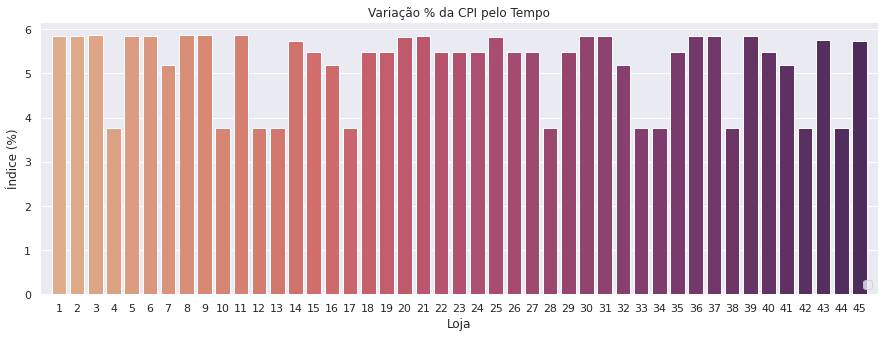

In [ ]:
f, ax = plt.subplots(figsize=(15, 5))
sns.barplot(y="CPI", x=df_grow.index, data=df_grow, palette="flare", order=df_grow.index)


ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(-1,45), ylabel="Índice (%)", xlabel="Loja", title= "Variação % da CPI pelo Tempo")
sns.despine(left=True, bottom=True)

Variação relativa baixa entre as lojas, provavelmente irrelevante para a tomada de decisão final. 

#Comparação da Loja 39 com a 44

Como a loja 39 possuí maior ganho bruto e o 2º maior percentual de crescimento, vamos compará-la com a 44, que possuí maior crescimento percentual e menor CPI.  

##Ganhos semanais em função do tempo das lojas 39 e 44

In [ ]:
df_39_44 = df.loc[(df['Store'] == 39) | (df['Store'] == 44)]
df_39_44.sort_values(by='Date', inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
fig = px.line(df_39_44, y="Weekly_Sales", x="Date", color="Store", title='Vendas Semanais das Lojas 39 e 44')
fig.show()

Observa-se que a loja 39 possui ganhos semanais muito maiores que a 44 (quase 5 vezes mais), além de possuir maior participação nas datas festivas.

##Trendline da loja 39

In [ ]:
df_39 = df.loc[(df['Store'] == 39)]
df_39.sort_values(by='Date', inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
fig_39 = px.scatter(df_39, y="Weekly_Sales", x="Date", trendline="lowess", title='Crescimento da loja 39',trendline_color_override="red")
fig_39.show()

Outliers podem ser explicados pelos dias festivos

##Trendline da loja 44

In [ ]:
df_44 = df.loc[(df['Store'] == 44)]
df_44.sort_values(by='Date', inplace=True)

In [ ]:
fig_44 = px.scatter(df_44, y="Weekly_Sales", x="Date", trendline="lowess", title='Crescimento da loja 44',trendline_color_override="red")
fig_44.show()

Outliers podem ser explicados pelos dias festivos

##Violinos da 39

###Violino de Desemprego

In [ ]:
fig = px.violin(df_39, y="Unemployment", x="Store", color="Store", box=True, points="all", hover_data=df.columns, title='Violino de Desemprego da 39')
fig.show()

###Violino de Vendas Semanais da 39

In [ ]:
fig = px.violin(df_39, y="Weekly_Sales", x="Store", color="Store", box=True, points="all", hover_data=df.columns, title='Violino de Vendas Semanais da 39')
fig.show()

Outliners explicados pelas datas festivas

##Violinos da 44

###Violino de Desemprego da 44

In [ ]:
fig = px.violin(df_44, y="Unemployment", x="Store", color="Store", box=True, points="all", hover_data=df.columns, title='Violino de Desemprego da 44')
fig.show()

###Violino de Vendas Semanais da 44

In [ ]:
fig = px.violin(df_44, y="Weekly_Sales", x="Store", color="Store", box=True, points="all", hover_data=df.columns, title='Violino de Vendas Semanais da 44')
fig.show()

##Comparação entre as porcentagens das lojas 39 e 44

In [ ]:
slice_list = [39,44]
df_conc = df_grow.iloc[df_grow.index.isin(slice_list)]
del df_conc['Holiday_Flag']
del df_conc['Temperature']
df_conc

,Weekly_Sales,Fuel_Price,CPI,Unemployment
Store,,,,
39,27.539906,36.314152,5.842515,-27.191957
44,28.452044,40.847712,3.757478,-35.743318


Podemos observar que a variação no preço do combustível é maior na loja 44 que na 39. Porém, o índice de preços (CPI) e o desempregro são melhores na 44 que na 39.

#Conclusão

A loja 39 parece ser a ideial para a realização de investimentos no momento. 

* A loja já possui grande retorno semanal, quando comparada às demais.
* A loja possui grande retorno nas datas festivas.
* O crescimento da loja foi expressivo, quando comparada às demais. 
* O fato de ela estar em segundo (e não em primeiro) na porcentagem de crescimento não é relevante, considerando que a diferença é de 1%.
* Os índices de desemprego estão baixando, o que sugere que o crescimento se manterá. 